# **Fetal Health Multi Classification Predicition**

## The reason for me to choose this dataset is because I studied it very well and understand the procedure takes place when a fetus is growing and widespearding the womb of a female. Hence, this dataset will show and help you understand how a fetus is observed during the growth of a 9 month period

In [24]:
#Imported all the necessary libraries to get started with this ML development
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint, uniform

As you can see that the dataset has been imported into the IDE and executing it will show the first 5 rows to preview how many columns and what labels we will dealt with.

In [25]:
fetal_health_df = pd.read_csv('/kaggle/input/fetal-health-class/fetal_health.csv')
fetal_health_df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [26]:
fetal_health_df.T

,0,1,2,3,4,5,6,7,8,9,...,2116,2117,2118,2119,2120,2121,2122,2123,2124,2125
baseline value,120.0,132.000,133.000,134.000,132.000,134.000,134.000,122.0,122.000,122.000,...,140.000,140.000,140.000,140.000,140.000,140.000,140.000,140.000,140.000,142.000
accelerations,0.0,0.006,0.003,0.003,0.007,0.001,0.001,0.0,0.000,0.000,...,0.004,0.000,0.000,0.000,0.000,0.000,0.001,0.001,0.001,0.002
fetal_movement,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002
uterine_contractions,0.0,0.006,0.008,0.008,0.008,0.010,0.013,0.0,0.002,0.003,...,0.004,0.008,0.006,0.007,0.005,0.007,0.007,0.007,0.006,0.008
light_decelerations,0.0,0.003,0.003,0.003,0.000,0.009,0.008,0.0,0.000,0.000,...,0.000,0.000,0.001,0.001,0.001,0.000,0.000,0.000,0.000,0.000
severe_decelerations,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
prolongued_decelerations,0.0,0.000,0.000,0.000,0.000,0.002,0.003,0.0,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
abnormal_short_term_variability,73.0,17.000,16.000,16.000,16.000,26.000,29.000,83.0,84.000,86.000,...,80.000,79.000,79.000,79.000,77.000,79.000,78.000,79.000,78.000,74.000
mean_value_of_short_term_variability,0.5,2.100,2.100,2.400,2.400,5.900,6.300,0.5,0.500,0.300,...,0.200,0.300,0.500,0.600,0.700,0.200,0.400,0.400,0.400,0.400
percentage_of_time_with_abnormal_long_term_variability,43.0,0.000,0.000,0.000,0.000,0.000,0.000,6.0,5.000,6.000,...,36.000,20.000,26.000,27.000,17.000,25.000,22.000,20.000,27.000,36.000


In [27]:
#the .info() method gives the info of the labels and there datatypes(and number of entries).
fetal_health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [28]:
#using the .describe(), we will now the statistical figures of each columns, eg. count, std(standard deviation), mean, min/max.
fetal_health_df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [29]:
#using .isna() and .sum method shows us the rows(which does not have numeric type) and sum for the total number of nan values.
fetal_health_df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [30]:
#The .corr() method will gives us the correlation between columns and which columns will be important in the future analysis of the development.
fetal_health_df.corr()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


I'm will be dropping some columns because these wouldn't affect the finally score of the development and display a identical reccuring value.

In [31]:
new_fetal_health_df = fetal_health_df.drop(['fetal_movement','histogram_min','light_decelerations','histogram_number_of_zeroes','histogram_number_of_peaks','histogram_max','histogram_width'], axis=1)
new_fetal_health_df

,baseline value,accelerations,uterine_contractions,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.006,0.0,0.0,17.0,2.1,0.0,10.4,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.008,0.0,0.0,16.0,2.1,0.0,13.4,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.008,0.0,0.0,16.0,2.4,0.0,23.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.008,0.0,0.0,16.0,2.4,0.0,19.9,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.007,0.0,0.0,79.0,0.2,25.0,7.2,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.007,0.0,0.0,78.0,0.4,22.0,7.1,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.007,0.0,0.0,79.0,0.4,20.0,6.1,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.006,0.0,0.0,78.0,0.4,27.0,7.0,152.0,147.0,151.0,4.0,1.0,2.0


To put this in better prepective for user to understand, let's use the matplotlib and seaborn libraries to use this corr method in a form of heatmap.
You will see a diagonal line across the table with a whole 1 point and around it shows the similar differences each value has for the columns.

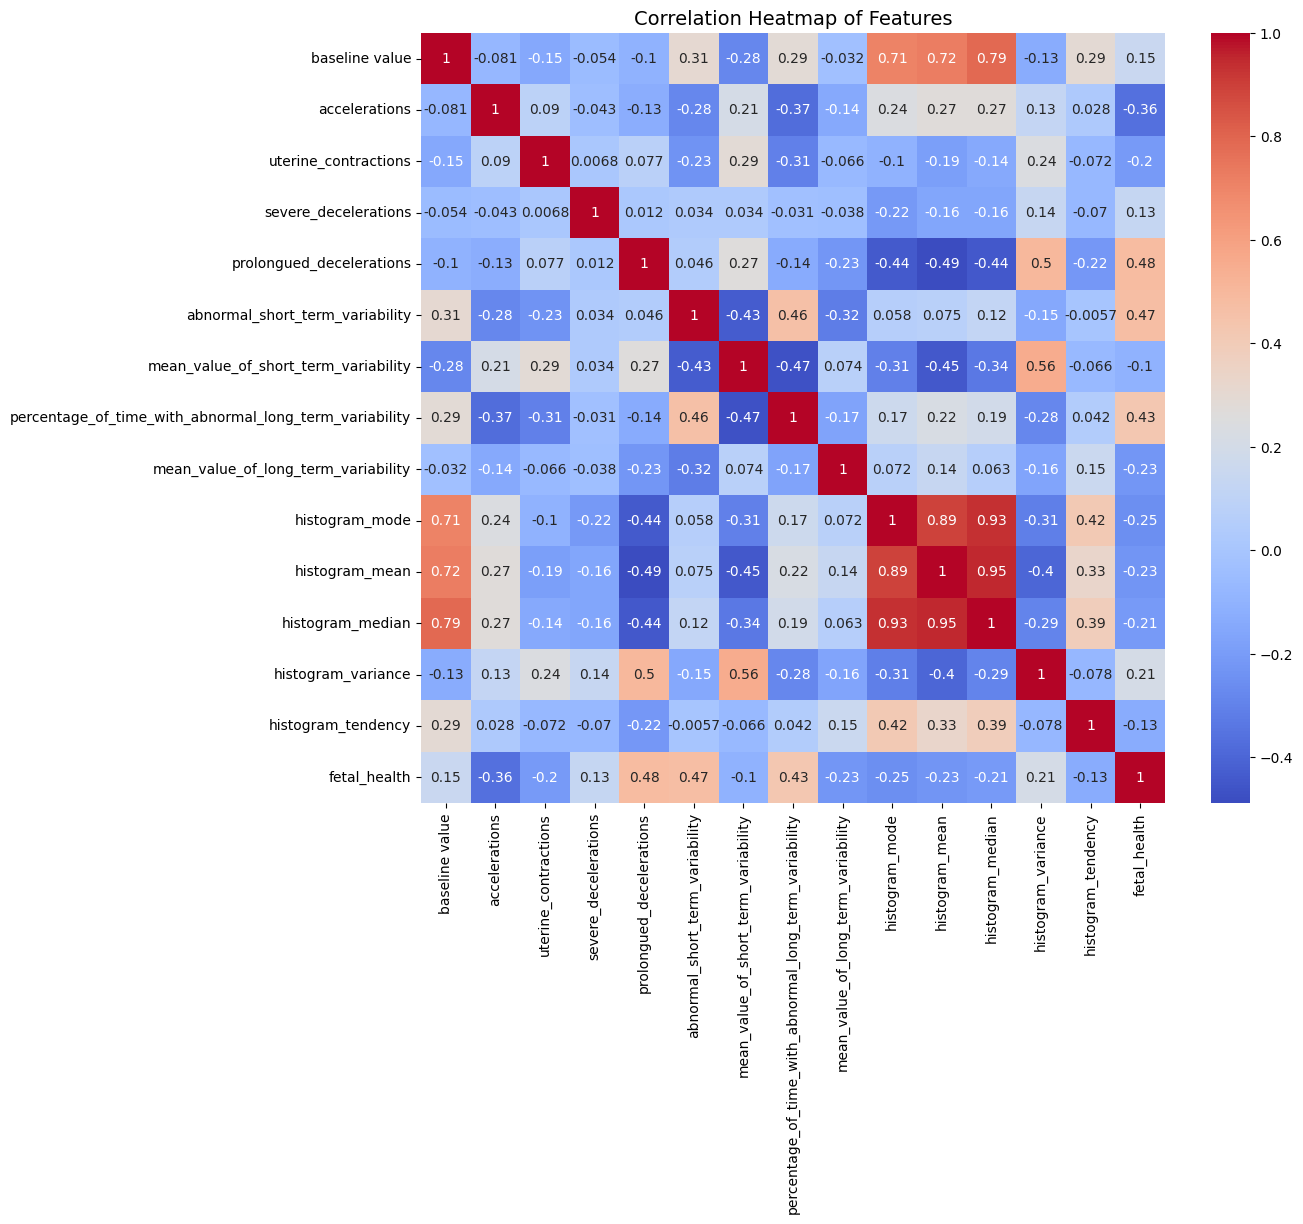

In [32]:
#Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = new_fetal_health_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Features', fontsize=14)
plt.show()

To ensure that the target labels are more specified and clearly visualised. I will use the boxplot graph to identify the classes that have the highest rate of extremely lethal cases of a fetus. 

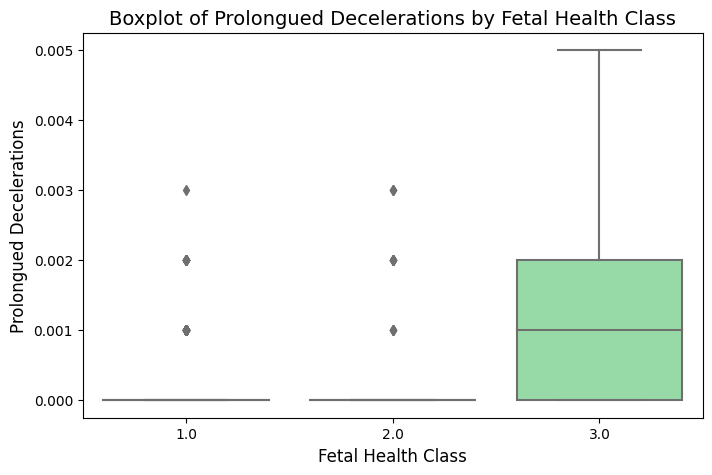

In [33]:
# Boxplot for a strongly correlated feature (prolongued_decelerations) with fetal_health
plt.figure(figsize=(8, 5))
sns.boxplot(x='fetal_health', y='prolongued_decelerations', data=new_fetal_health_df, palette='pastel')
plt.title('Boxplot of Prolongued Decelerations by Fetal Health Class', fontsize=14)
plt.xlabel('Fetal Health Class', fontsize=12)
plt.ylabel('Prolongued Decelerations', fontsize=12)
plt.show()

As you can see above the generted graph. The health of a fetal is most of the cases are less than class 3 with the decleration of 0.0002.

After getting done with the cleaning and preprocessing the non-null dataset. Let's get on with our Machine Learning development and import all the necessary metrics, preprocessing, model_selection, algorthim in here.

* I will be using the GradiantBosstingClassifier algorithm to train and test the model
* To train and test the seperated data, the train_test_split will be used and to hypertune the model to get beeter performance and good capabilities. I will use the RandomizedSearchCV to go through the dataset randomly
* To also normalized all the datapoints of each row, so the data doesn't overfit/underfit in both areas and should't affect the final score.

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,log_loss,confusion_matrix,hamming_loss,make_scorer,classification_report,roc_curve,auc,ConfusionMatrixDisplay
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize,StandardScaler

In [35]:
#Splititng the features and traget labels in X and y
X = new_fetal_health_df.drop(['fetal_health'], axis=1)
y = new_fetal_health_df['fetal_health']

In [36]:
#Further splitting the data into train and test split and giving a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=42)


In [37]:
y_train.T

1233    1.0
480     2.0
1111    1.0
1303    1.0
861     1.0
       ... 
1638    1.0
1095    1.0
1130    1.0
1294    1.0
860     1.0
Name: fetal_health, Length: 1700, dtype: float64

In [38]:
y_test

282     1.0
1999    1.0
1709    1.0
988     1.0
2018    1.0
       ... 
305     2.0
973     1.0
611     1.0
2108    1.0
192     2.0
Name: fetal_health, Length: 426, dtype: float64

In [39]:
#The use of SMOTE is to ensure if the classes are not over or under-sampled
# Perform Synthetic Minority Over-sampling Technique (SMOTE)
from imblearn.over_sampling import SMOTE

# Extract features (X) and target variable (y)
X = new_fetal_health_df.drop(columns=['fetal_health'])
y = new_fetal_health_df['fetal_health']

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Check the class distribution after SMOTE
y_smote.value_counts()

fetal_health
2.0    1655
1.0    1655
3.0    1655
Name: count, dtype: int64

In [40]:
#This is were the magic works, the model will be parametered with necessary function to make sure the score is not affected.
#the .fit() method will be using training data and .score() method will use test data to give unaffected, balanced score.
grad_bos_class_model = GradientBoostingClassifier(random_state=42,
                                                  loss='log_loss',
                                                  verbose=1)
grad_bos_class_model.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           0.5582            1.51s
         2           0.4913            1.43s
         3           0.4426            1.36s
         4           0.4039            1.31s
         5           0.3699            1.27s
         6           0.3422            1.25s
         7           0.3184            1.23s
         8           0.2983            1.21s
         9           0.2809            1.19s
        10           0.2625            1.18s
        20           0.1707            1.02s
        30           0.1313            0.87s
        40           0.1082            0.75s
        50           0.0910            0.62s
        60           0.0789            0.50s
        70           0.0698            0.37s
        80           0.0614            0.25s
        90           0.0550            0.12s
       100           0.0493            0.00s


GradientBoostingClassifier(random_state=42, verbose=1)

In [41]:
#This is the score of the dataset. 95.77%
grad_bos_class_model.score(X_test,y_test)

0.9577464788732394

In [42]:
print(f'the score with Gradient Boosting Classifier is: {grad_bos_class_model.score(X_test,y_test)*100:.2f}%')

the score with Gradient Boosting Classifier is: 95.77%


In [43]:
y_test

282     1.0
1999    1.0
1709    1.0
988     1.0
2018    1.0
       ... 
305     2.0
973     1.0
611     1.0
2108    1.0
192     2.0
Name: fetal_health, Length: 426, dtype: float64

In [44]:
y_pred = grad_bos_class_model.predict(X_test)
y_pred

array([1., 1., 1., 1., 1., 3., 1., 3., 2., 2., 1., 3., 1., 1., 1., 1., 3.,
       1., 2., 1., 1., 1., 3., 1., 1., 3., 3., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 3., 2., 2., 1., 2., 1., 1., 1., 1., 1., 3., 1., 1., 1.,
       1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 3., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 3., 2., 1., 2., 1.,
       1., 1., 1., 2., 1., 1., 3., 1., 2., 2., 1., 2., 1., 3., 1., 1., 2.,
       1., 1., 2., 1., 1., 3., 3., 3., 1., 1., 1., 3., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1.,
       1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1.,
       1., 3., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [45]:
y_prob = grad_bos_class_model.predict_proba(X_test)[:,1]
y_prob

array([5.62705262e-03, 6.78808145e-03, 2.14658160e-02, 1.60376840e-03,
       1.48416522e-02, 2.73866081e-03, 3.23928011e-03, 6.09253717e-03,
       7.60179252e-01, 9.72059917e-01, 2.63585354e-03, 4.65227462e-04,
       1.84890799e-02, 1.01272761e-03, 2.50553773e-03, 1.87651010e-01,
       9.47065845e-02, 3.98293059e-03, 6.65827048e-01, 6.48283247e-03,
       2.76626010e-02, 1.46236657e-03, 2.88044019e-03, 3.24177526e-03,
       4.91491330e-02, 5.25475555e-03, 5.05546670e-04, 3.09473757e-01,
       1.83116061e-03, 2.30080344e-03, 8.00451912e-02, 1.05557098e-03,
       2.99751034e-03, 1.27815932e-01, 1.48544215e-02, 7.88452557e-03,
       1.90338930e-03, 1.35349941e-04, 9.76054344e-01, 8.54982817e-01,
       3.18030502e-03, 9.00055340e-01, 1.88556358e-03, 1.78842521e-03,
       2.99538920e-03, 1.87566581e-01, 3.66361310e-03, 8.27643133e-03,
       1.88556358e-03, 3.66394282e-03, 4.83852151e-03, 2.99013152e-03,
       9.82351231e-01, 9.35537082e-01, 9.84528127e-01, 1.96023595e-03,
      

In [46]:
fetal_health_acc = accuracy_score(y_test,y_pred)
print(f'The accuracy score for fetal health: {fetal_health_acc*100:.2f}%')

The accuracy score for fetal health: 95.77%


In [47]:
fetal_health_precision_weighted = precision_score(y_test, y_pred, average='weighted')
print(f'The precision score for fetal health: {fetal_health_precision_weighted*100:.2f}%')

The precision score for fetal health: 95.80%


In [48]:
fetal_health_f1 = f1_score(y_test,y_pred, average='weighted')
print(f'The F1 score for fetal health: {fetal_health_f1*100:.2f}%')

The F1 score for fetal health: 95.74%


In [49]:
fetal_health_recall = recall_score(y_test,y_pred, average='weighted')
print(f'The Recall score for fetal health: {fetal_health_recall*100:.2f}%')

The Recall score for fetal health: 95.77%


In [50]:
fetal_health_log_loss = log_loss(y_test,y_pred, labels=[1.,2.])
print(f'The log loss score for fetal health: {fetal_health_log_loss*100:.2f}%')

The log loss score for fetal health: 2817.50%


In [51]:
fetal_health_confusion_matrix = confusion_matrix(y_test,y_pred)
print(fetal_health_confusion_matrix)

[[325   5   3]
 [  9  54   1]
 [  0   0  29]]


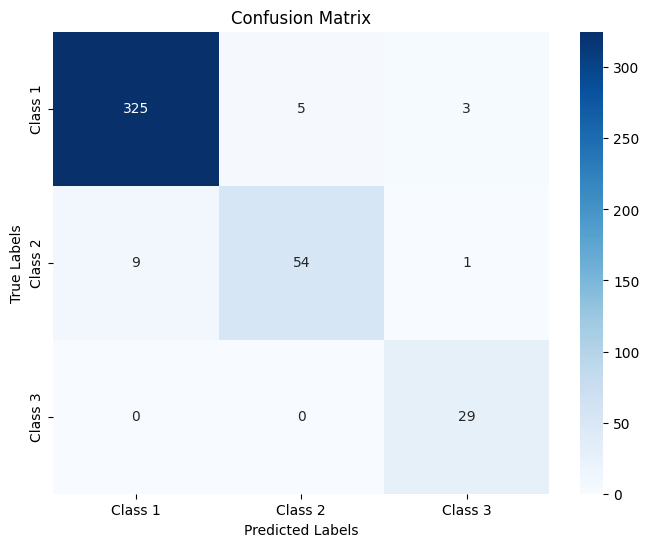

In [52]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(fetal_health_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 1', 'Class 2', 'Class 3'], 
            yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [53]:
# Hamming Loss
print(f"Hamming Loss: {hamming_loss(y_test, y_pred)*100:.2f}%")

Hamming Loss: 4.23%


In [54]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

# Perform cross-validation
cv_results = cross_validate(grad_bos_class_model, X, y, cv=5, scoring=scoring, return_train_score=True)

      Iter       Train Loss   Remaining Time 
         1           0.5517            1.28s
         2           0.4843            1.23s
         3           0.4345            1.22s
         4           0.3950            1.20s
         5           0.3639            1.18s
         6           0.3375            1.18s
         7           0.3140            1.16s
         8           0.2941            1.15s
         9           0.2754            1.13s
        10           0.2592            1.12s
        20           0.1643            0.97s
        30           0.1235            0.84s
        40           0.1009            0.72s
        50           0.0832            0.60s
        60           0.0725            0.48s
        70           0.0637            0.36s
        80           0.0565            0.24s
        90           0.0504            0.12s
       100           0.0454            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.5561            1.57s
        

In [55]:
# Print cross-validation results
print("Cross-Validation Results:")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean()*100:.4f}")
print(f"Mean Precision (Macro): {cv_results['test_precision_macro'].mean()*100:.4f}")
print(f"Mean Recall (Macro): {cv_results['test_recall_macro'].mean()*100:.4f}")
print(f"Mean F1 Score (Macro): {cv_results['test_f1_macro'].mean()*100:.4f}")

Cross-Validation Results:
Mean Accuracy: 88.0982
Mean Precision (Macro): 82.8513
Mean Recall (Macro): 82.8722
Mean F1 Score (Macro): 81.7762


In [56]:
fetal_health_class_report = classification_report(y_test,y_pred)
print(fetal_health_class_report)

              precision    recall  f1-score   support

         1.0       0.97      0.98      0.97       333
         2.0       0.92      0.84      0.88        64
         3.0       0.88      1.00      0.94        29

    accuracy                           0.96       426
   macro avg       0.92      0.94      0.93       426
weighted avg       0.96      0.96      0.96       426



In [57]:
# Define the distribution of hyperparameters
gs_fetal_health = {
    'n_estimators': randint(100,200),
    'learning_rate': uniform(0.01, 0.19),
    'max_depth': randint(3, 7),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'subsample': uniform(0.6, 0.4)
}

# Set up the RandomizedSearchCV
fetal_health_random_search = RandomizedSearchCV(estimator=grad_bos_class_model, 
                                   param_distributions=gs_fetal_health, 
                                   n_iter=50, 
                                   cv=5, 
                                   scoring='accuracy', 
                                   n_jobs=-1, 
                                   random_state=42, 
                                   verbose=1)

In [58]:
fetal_health_random_search.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5037           0.1440            1.76s
         2           0.4441           0.0696            1.74s
         3           0.3661           0.0613            1.73s
         4           0.3301           0.0338            1.70s
         5           0.2828           0.0342            1.69s
         6           0.2640           0.0259            1.67s
         7           0.2328           0.0212            1.65s
         8           0.2066           0.0181            1.64s
         9           0.1875           0.0174            1.63s
        10           0.1769           0.0119            1.61s
        20           0.0845           0.0029            1.44s
        30           0.0493           0.0008            1.31s
        40           0.0327          -0.0001            1.20s
        50           0.0230          -0.0001            1.10s
       

RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingClassifier(random_state=42,
                                                        verbose=1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cf112364d90>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cf112455420>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cf10bf84b20>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cf10bfd9210>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cf1123a6bf0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cf10bf86da0>},
                   random_state=42, scoring='accuracy', verbose=1)

In [59]:
print(f'The score using GridSearchCV is: {fetal_health_random_search.score(X_test,y_test)*100:.2f}%')

The score using GridSearchCV is: 96.01%


In [60]:
fetal_health_random_search.best_params_

{'learning_rate': 0.12360099597410618,
 'max_depth': 6,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 161,
 'subsample': 0.7301321323053057}

In [61]:
# Output the best parameters and best score
print(f"Best Parameters:", fetal_health_random_search.best_params_)
print(f"Best Cross-Validation Accuracy: {fetal_health_random_search.best_score_*100:.2f}%")

Best Parameters: {'learning_rate': 0.12360099597410618, 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 161, 'subsample': 0.7301321323053057}
Best Cross-Validation Accuracy: 95.00%


In [62]:
# Predict on the test set
y_pred = fetal_health_random_search.best_estimator_.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.960093896713615
Classification Report:
               precision    recall  f1-score   support

         1.0       0.97      0.98      0.98       333
         2.0       0.90      0.86      0.88        64
         3.0       0.93      0.97      0.95        29

    accuracy                           0.96       426
   macro avg       0.94      0.93      0.94       426
weighted avg       0.96      0.96      0.96       426



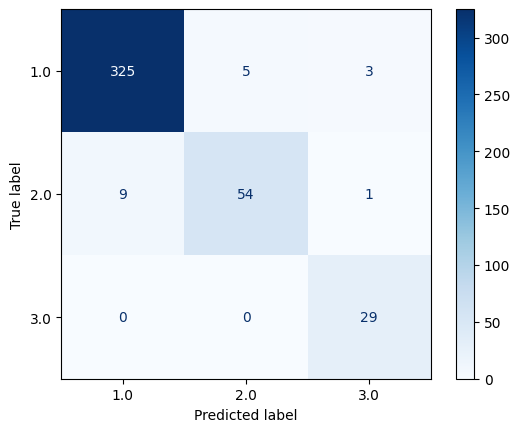

In [63]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=fetal_health_confusion_matrix, display_labels=fetal_health_random_search.best_estimator_.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

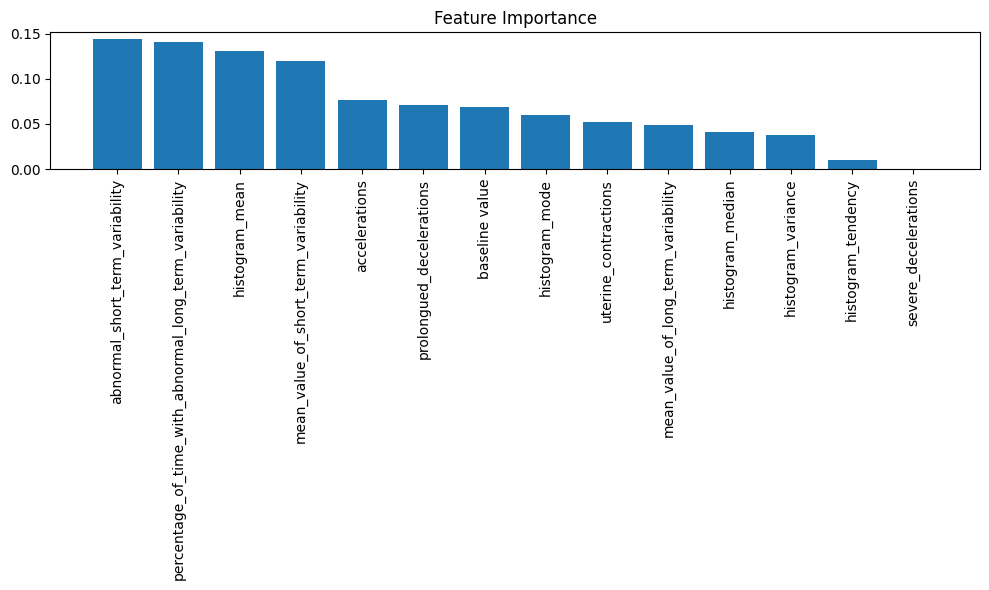

In [64]:
#this code applies to columns which helps the model make more regouris and optimised. To see which columns made less differences into the final score of the development.
importances = fetal_health_random_search.best_estimator_.feature_importances_
feature_names = new_fetal_health_df.columns[:-1]
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()


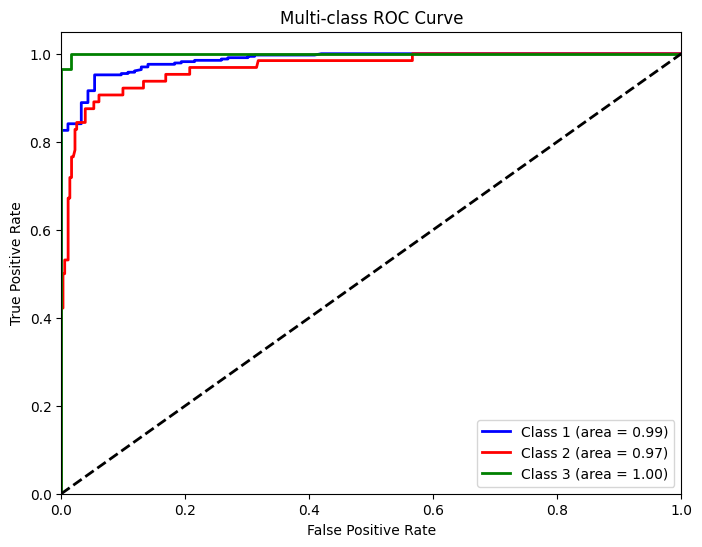

In [65]:
# Separate features and target
X = new_fetal_health_df.drop('fetal_health', axis=1)
y = new_fetal_health_df['fetal_health']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Binarize the output labels for multi-class ROC
y_bin = label_binarize(y, classes=[1, 2, 3])
n_classes = y_bin.shape[1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Train a OneVsRestClassifier with GradientBoostingClassifier
classifier = OneVsRestClassifier(GradientBoostingClassifier(random_state=42))
classifier.fit(X_train, y_train)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], classifier.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i + 1} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show()


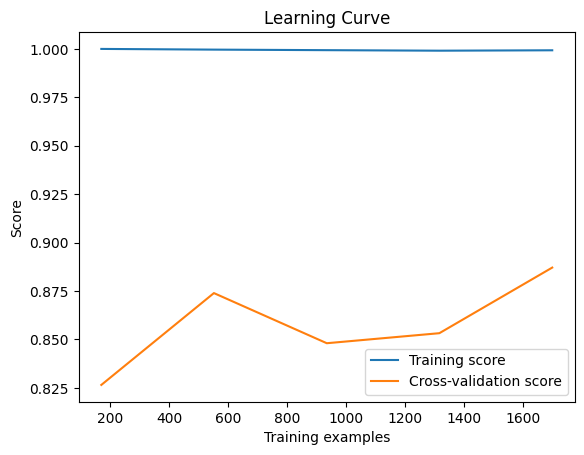

In [66]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    fetal_health_random_search.best_estimator_, X, y, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy')

# Plot learning curve
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.title('Learning Curve')
plt.show()


In [67]:
#using the pickle library to save the trained model
import pickle

with open('fetal_health_model.pkl', 'wb') as f:
    pickle.dump(grad_bos_class_model, f)

In [74]:
# Installing the gradio library to create the interface with the trained model
!pip install -q gradio # remove '-q' to see the output

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 24.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 464.1/464.1 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.3/130.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 85.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.8 MB/s eta 0:00:00


In [75]:
#importing the model back to the IDE and using the os library to check if the model is saved and the file exist in the IDE.
import pickle

# Save your trained model to a file
with open("fetal_health_model.pkl", "wb") as grad_file:
    pickle.dump(grad_bos_class_model, grad_file)

import os

# Check if the file exists
if os.path.exists("fetal_health_model.pkl"):
    print("Model file exists and is saved correctly.")
else:
    print("Model file does not exist. Please save your model again.")



Model file exists and is saved correctly.


In [1]:
import gradio as gr
import pandas as pd
import pickle
import random

# Load the trained model
with open("fetal_health_model.pkl", "rb") as grad_file:
    model = pickle.load(grad_file)

# List of features the model was trained on
model_features = [
    'baseline value', 'accelerations', 'uterine_contractions',
    'severe_decelerations', 'prolongued_decelerations',
    'abnormal_short_term_variability', 'mean_value_of_short_term_variability',
    'percentage_of_time_with_abnormal_long_term_variability',
    'mean_value_of_long_term_variability', 'histogram_mode', 'histogram_mean',
    'histogram_median', 'histogram_variance', 'histogram_tendency'
]

# Define the prediction function
def predict_fetal_health(*inputs):
    # Create a DataFrame with all model features
    input_data = pd.DataFrame([inputs], columns=model_features)

    # Predict the class and probabilities
    prediction = model.predict(input_data)[0]
    probabilities = model.predict_proba(input_data)[0]

    # Create a confidence score dictionary
    confidence_scores = {f"Class {i+1}": f"{prob*100:.2f}%" for i, prob in enumerate(probabilities)}

    # Medical interpretation of the class
    interpretation = "Good" if prediction == 1 else "Neutral" if prediction == 2 else "Bad"

    # Return prediction, confidence scores, and interpretation
    return f"Prediction: Class {prediction}", confidence_scores, f"Medical Interpretation: {interpretation}"

# Function to generate a random report
def random_report():
    random_inputs = [
        random.uniform(106, 160),  # Baseline Value
        random.uniform(0, 8),     # Accelerations
        random.uniform(0, 10),    # Uterine Contractions
        random.uniform(0, 3),     # Severe Decelerations
        random.uniform(0, 5),     # Prolongued Decelerations
        random.uniform(0, 10),    # Abnormal Short-Term Variability
        random.uniform(0, 20),    # Mean Short-Term Variability
        random.uniform(0, 100),   # Percentage Abnormal Long-Term Variability
        random.uniform(0, 50),    # Mean Long-Term Variability
        random.uniform(50, 150),  # Histogram Mode
        random.uniform(50, 150),  # Histogram Mean
        random.uniform(50, 150),  # Histogram Median
        random.uniform(0, 100),   # Histogram Variance
        random.uniform(-1, 1)     # Histogram Tendency
    ]
    return predict_fetal_health(*random_inputs)

# Function to display help instructions which can help user interact well with the interface.
def display_help():
    instructions = (
        "1. Adjust the sliders to input feature values for fetal health prediction.\n"
        "2. Click 'Submit' to get the prediction and confidence scores.\n"
        "3. Use 'Random Report' to generate a random set of inputs and view the prediction.\n"
        "4. Check the 'Medical Interpretation' for a simplified result: Good, Neutral, or Bad.\n"
    )
    return instructions

# Define Gradio sliders for all model features
sliders = [
    gr.Slider(106, 160, step=1, label="Baseline Value"),
    gr.Slider(0, 8, step=0.1, label="Accelerations"),
    gr.Slider(0, 10, step=0.1, label="Uterine Contractions"),
    gr.Slider(0, 3, step=0.1, label="Severe Decelerations"),
    gr.Slider(0, 5, step=0.1, label="Prolongued Decelerations"),
    gr.Slider(0, 10, step=0.1, label="Abnormal Short-Term Variability"),
    gr.Slider(0, 20, step=0.1, label="Mean Short-Term Variability"),
    gr.Slider(0, 100, step=1, label="Percentage Abnormal Long-Term Variability"),
    gr.Slider(0, 50, step=1, label="Mean Long-Term Variability"),
    gr.Slider(50, 150, step=1, label="Histogram Mode"),
    gr.Slider(50, 150, step=1, label="Histogram Mean"),
    gr.Slider(50, 150, step=1, label="Histogram Median"),
    gr.Slider(0, 100, step=1, label="Histogram Variance"),
    gr.Slider(-1, 1, step=0.1, label="Histogram Tendency"),
]

# Main interface for fetal health prediction
main_interface = gr.Interface(
    fn=predict_fetal_health,
    inputs=sliders,
    outputs=[
        gr.Textbox(label="Prediction"),
        gr.JSON(label="Confidence Scores"),
        gr.Textbox(label="Medical Interpretation")
    ],
    title="Fetal Health Prediction",
    description="This interface is used to predict fetal health using various clinical parameters."
)

# Random report interface
random_report_interface = gr.Interface(
    fn=random_report,
    inputs=[],
    outputs=[
        gr.Textbox(label="Prediction"),
        gr.JSON(label="Confidence Scores"),
        gr.Textbox(label="Medical Interpretation")
    ],
    title="Random Report",
    description="Generates a random set of inputs for fetal health prediction."
)

# Help section interface
help_interface = gr.Interface(
    fn=display_help,
    inputs=[],
    outputs=gr.Textbox(label="Help Section"),
    title="Help Section",
    description="Instructions on how to use the Fetal Health Prediction Interface."
)

# Tabbed interface with all components
interface = gr.TabbedInterface(
    [
        main_interface,
        random_report_interface,
        help_interface
    ],
    tab_names=["Fetal Health Prediction", "Random Report", "Help"]
)

# Launch the interface
interface.launch(share=True)


ModuleNotFoundError: No module named 'gradio'